In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1973 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

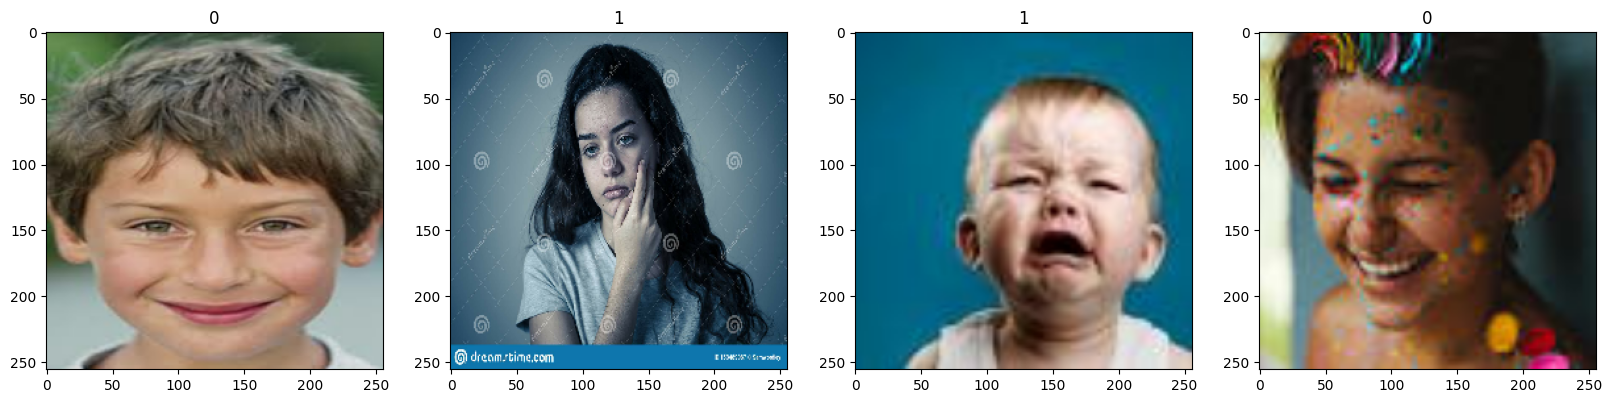

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.71649814, 0.64967686, 0.34175763],
          [0.7838637 , 0.7528464 , 0.3028143 ],
          [0.72502345, 0.7164096 , 0.29106444],
          ...,
          [0.952451  , 0.95191485, 0.84962994],
          [0.98327494, 0.97967505, 0.9015194 ],
          [0.9658849 , 0.96959203, 0.914107  ]],
 
         [[0.6521863 , 0.59592235, 0.38909313],
          [0.73067456, 0.7153014 , 0.35659802],
          [0.6903196 , 0.69856817, 0.3568709 ],
          ...,
          [0.92446434, 0.92061937, 0.8446624 ],
          [0.98547316, 0.97856444, 0.92286164],
          [0.9481225 , 0.9485208 , 0.900079  ]],
 
         [[0.61971027, 0.5957826 , 0.40795514],
          [0.7077747 , 0.7243729 , 0.38353246],
          [0.67727387, 0.7195619 , 0.37902546],
          ...,
          [0.9019689 , 0.8935896 , 0.83325815],
          [0.94450206, 0.93958384, 0.89302236],
          [0.9804812 , 0.98035383, 0.945616  ]],
 
         ...,
 
         [[0.7232666 , 0.71181065, 0.77082616],
          [0.55566

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:

train_size

43

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [29]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [89]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
43/43 [==============================] - 57s 1s/step - loss: 0.0339 - accuracy: 0.9920 - val_loss: 0.7085 - val_accuracy: 0.8359
Epoch 2/10
43/43 [==============================] - 64s 1s/step - loss: 0.0303 - accuracy: 0.9920 - val_loss: 0.5639 - val_accuracy: 0.8490
Epoch 3/10
43/43 [==============================] - 56s 1s/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.8751 - val_accuracy: 0.8099
Epoch 4/10
43/43 [==============================] - 61s 1s/step - loss: 0.0243 - accuracy: 0.9956 - val_loss: 0.7833 - val_accuracy: 0.8411
Epoch 5/10
43/43 [==============================] - 58s 1s/step - loss: 0.0298 - accuracy: 0.9942 - val_loss: 0.7860 - val_accuracy: 0.8047
Epoch 6/10
43/43 [==============================] - 51s 1s/step - loss: 0.0271 - accuracy: 0.9956 - val_loss: 0.8445 - val_accuracy: 0.8333
Epoch 7/10
43/43 [==============================] - 59s 1s/step - loss: 0.0199 - accuracy: 0.9964 - val_loss: 0.6245 - val_accuracy: 0.8438
Epoch 8/10
43/43 [==

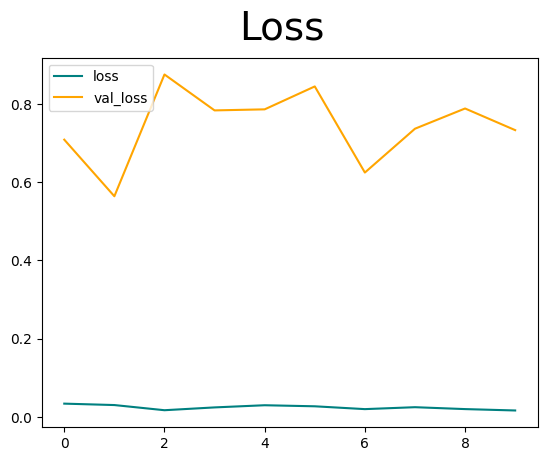

In [90]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=28)
plt.legend(loc="upper left")
plt.show()

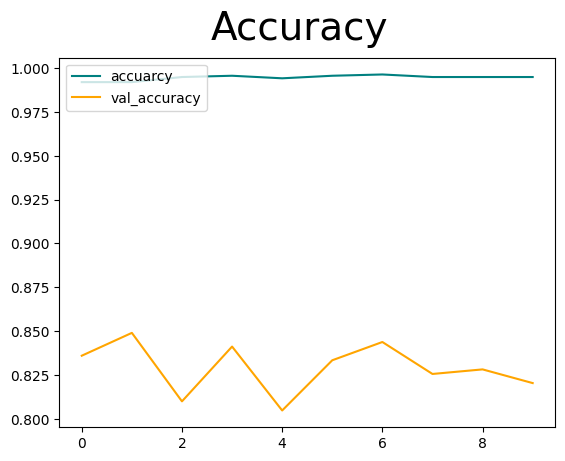

In [91]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuarcy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=28)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 212ms/step


In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.81578946, shape=(), dtype=float32) tf.Tensor(0.80172414, shape=(), dtype=float32) tf.Tensor(0.7708333, shape=(), dtype=float32)


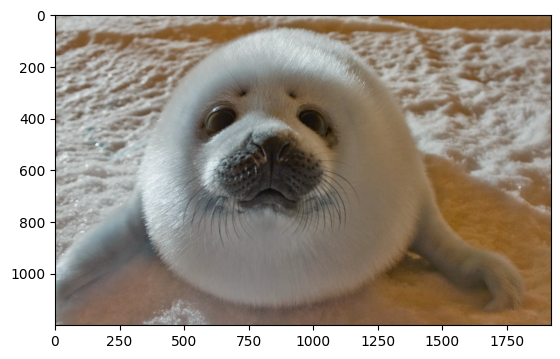

In [111]:
import cv2
img = cv2.imread('pandu.jpg')
plt.imshow(img)
plt.show()

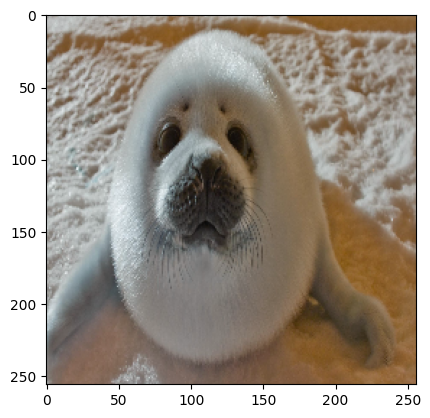

In [112]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [113]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 54ms/step


array([[0.9989208]], dtype=float32)

In [114]:
if yhat > 0.5: 
    print(f'Predicted picture is Sad\n')    
elif yhat>=0.4 and yhat<0.5:
    print(f'unable to tell if happy or sad ')
else:
    print(f'Predicted picture is Happy')

Predicted picture is Sad



In [44]:
from tensorflow.keras.models import load_model


In [46]:
model.save(os.path.join('models','imageclassifier.h5'))

In [48]:
new_model = load_model('models\imageclassifier.h5')

In [49]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 177ms/step


array([[0.03191052]], dtype=float32)